In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [5]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [6]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

In [8]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [9]:
y = np.ravel(y)
y, y.shape

(array([1., 1., 1., ..., 0., 0., 0.]), (6366,))

In [10]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


- Modelling directly on complete data set.

In [11]:
model = LogisticRegression()
model.fit(X,y)

model.score(X, y)

C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [12]:
pred_y = model.predict(X)
pred_y

array([0., 1., 0., ..., 0., 0., 0.])

In [13]:
list(zip(X.columns,np.transpose(model.coef_)))

[('Intercept', array([1.48983589])),
 ('occ_2', array([0.18806639])),
 ('occ_3', array([0.49894787])),
 ('occ_4', array([0.25066856])),
 ('occ_5', array([0.83900806])),
 ('occ_6', array([0.83390843])),
 ('occ_husb_2', array([0.19063594])),
 ('occ_husb_3', array([0.29783271])),
 ('occ_husb_4', array([0.16140885])),
 ('occ_husb_5', array([0.18777091])),
 ('occ_husb_6', array([0.19401637])),
 ('rate_marriage', array([-0.70312336])),
 ('age', array([-0.05841777])),
 ('yrs_married', array([0.10567654])),
 ('children', array([0.01691927])),
 ('religious', array([-0.37113627])),
 ('educ', array([0.0040165]))]

-  **Evaluate the model by spitting the data into train and test sets.**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# predict class labels for the test set
pred_train = model2.predict(X_train)
pred_test = model2.predict(X_test)
pred_train[:10], pred_test[:10]

(array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0.]))

In [16]:
print('Accuracy score of train set: ', metrics.accuracy_score(model2.predict(X_train), y_train))

Accuracy score of train set:  0.7289048473967684


In [17]:
print('Accuracy score of test set: ',metrics.accuracy_score(model2.predict(X_test), y_test))

Accuracy score of test set:  0.7146596858638743


In [18]:
metrics.confusion_matrix(y_test, pred_test)

array([[1142,  121],
       [ 424,  223]], dtype=int64)

In [19]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1263
         1.0       0.65      0.34      0.45       647

   micro avg       0.71      0.71      0.71      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.70      0.71      0.69      1910



In [20]:
# generate the class probabilities
clsprob = model2.predict_proba(X_test)
clsprob

array([[0.73902032, 0.26097968],
       [0.70738624, 0.29261376],
       [0.3362158 , 0.6637842 ],
       ...,
       [0.89617555, 0.10382445],
       [0.40085236, 0.59914764],
       [0.89746764, 0.10253236]])

In [21]:
clsprob[:,1]

array([0.26097968, 0.29261376, 0.6637842 , ..., 0.10382445, 0.59914764,
       0.10253236])

In [22]:
metrics.roc_auc_score(y_test,clsprob[:,1])

0.7315718689462662

In [23]:
fpr, tpr, thres = metrics.roc_curve(y_test, clsprob[:,1])
pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thres':thres})[10:20]

,fpr,tpr,thres
10,0.003167,0.037094,0.842896
11,0.004751,0.037094,0.839617
12,0.004751,0.041731,0.834006
13,0.005542,0.041731,0.828816
14,0.005542,0.043277,0.826970
15,0.006334,0.043277,0.823198
16,0.006334,0.058733,0.810753
17,0.007918,0.058733,0.791687
18,0.007918,0.061824,0.781431
19,0.008709,0.061824,0.778879


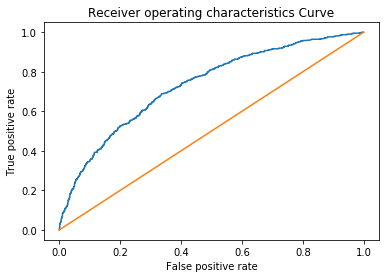

In [24]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics Curve')
plt.plot([0,1], [0,1], linestyle='-')

- **Evaluating the model using 5-fold cross validation**

In [25]:
score = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
score, score.mean()

C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yashwant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

(array([0.71271586, 0.72291994, 0.71899529, 0.71855346, 0.75157233]),
 0.7249513738732067)

- The model is performing at an accuracy of around **72%**.
- After using K-Fold as well, the model is giving the average accuracy of 72%.